In [ ]:
# Усов Руслан Николаевич
# Тема преддипломной практики: «Разработка алгоритмов машинного обучения для обнаружения ошибок в текстах (на примере Частного образовательного учреждения высшего образования «Московский университет имени С.Ю. Витте»)»

# Первичная обработка данных, анализ

In [18]:
# Импорты
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import Levenshtein
from wordcloud import WordCloud

print(f'Библиотеки ипортированы:')
print('matplotlib', matplotlib.__version__)
print('seaborn', sns.__version__)
print('numpy', np.__version__)
print('wordcloud', pd.__version__)
print('Levenshtein')
print('Counter')


Библиотеки ипортированы:
matplotlib 3.9.2
seaborn 0.13.2
numpy 1.26.4
wordcloud 2.2.3
Levenshtein
Counter


## Объединение датасета разных файлов в один

In [7]:
# Пути к файлам
input_files = [
    "../data/raw/wikipedia.txt",
    "../data/raw/aspell.txt",
    "../data/raw/birkbeck.txt"
]

print(f'Файлы wikipedia.txt, aspell.txt и birkbeck.txt загружены')

# Парсер файлов
def parse_file(path):
    data = []
    with open(path, "r", encoding="utf-8") as file:
        for line in file:
            if ":" not in line:
                continue
            correct, typos = line.split(":", 1)
            correct = correct.strip()
            for typo in typos.strip().split():
                data.append({"correct": correct, "noisy": typo})
    return data

# Сбор всех строк из всех файлов
all_data = []
for file_path in input_files:
    if os.path.exists(file_path):
        all_data.extend(parse_file(file_path))
    else:
        print(f"Файл не найден: {file_path}")

# Преобразование в DataFrame
df = pd.DataFrame(all_data)

# Сохранение в CSV
output_path = "../data/processed/dataset.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False, encoding="utf-8")

print(f'Датасет сформирован')

Файлы wikipedia.txt, aspell.txt и birkbeck.txt загружены
Датасет сформирован


In [19]:
# Загрузка датасета и формирование df
print("Загружаем датасет...")
df = pd.read_csv("../data/processed/dataset.csv")
print(f"Загружен датасет с количеством {len(df)} строк")
df.head()

Загружаем датасет...
Загружен датасет с количеством 39119 строк


,correct,noisy
0,Apennines,Apenines
1,Apennines,Appenines
2,Athenian,Athenean
3,Athenians,Atheneans
4,Bernoulli,Bernouilli


In [24]:
# Формируем первичный анализ по словам
print("Анализируем базовую статистику по датасету...")

print("Уникальных правильных слов:", df["correct"].nunique())
print("Уникальных опечаток:", df["noisy"].nunique())
print("Средняя длина правильных слов:", df["correct"].str.len().mean())
print("Средняя длина ошибочных слов:", df["noisy"].str.len().mean())

print("Анализ завершен")

Анализируем базовую статистику по датасету...
Уникальных правильных слов: 7402
Уникальных опечаток: 36108
Средняя длина правильных слов: 8.180296019836907
Средняя длина ошибочных слов: 7.702029756122501
Анализ завершен


Построение графика распределения по длинне слов...


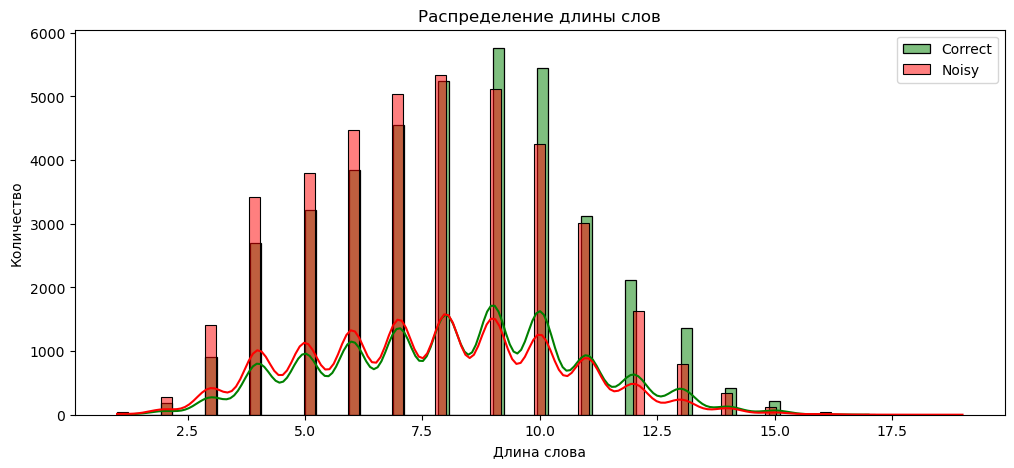

График построен


In [28]:
# Построение графика зависимости длинны слов
print("Построение графика распределения по длинне слов...")

df["correct_len"] = df["correct"].str.len()
df["noisy_len"] = df["noisy"].str.len()

plt.figure(figsize=(12, 5))
sns.histplot(df["correct_len"], color="green", label="Correct", kde=True)
sns.histplot(df["noisy_len"], color="red", label="Noisy", kde=True)
plt.title("Распределение длины слов")
plt.legend()
plt.xlabel("Длина слова")
plt.ylabel("Количество")
plt.savefig('../src/analysis-stat/len.png', dpi=300)
plt.show()

print("График построен")